In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Lee el archivo CSV
df = pd.read_csv(r'C:\Users\NayelyC\Desktop\Universidad\AnaliticaPredictiva\Semana4\Tarea4.2\Walmart.csv')

# Muestra las primeras filas del DataFrame
print(df.head(10))

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   
5      1  12-03-2010    1439541.59             0        57.79       2.667   
6      1  19-03-2010    1472515.79             0        54.58       2.720   
7      1  26-03-2010    1404429.92             0        51.45       2.732   
8      1  02-04-2010    1594968.28             0        62.27       2.719   
9      1  09-04-2010    1545418.53             0        65.86       2.770   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
#Renombramos las columanas
df.rename({'Store':'tienda', 'Weekly_Sales': 'ventas_semanales', 'Holiday_Flag':'semana_festiva',
           'Temperature': 'temperatura', 'Fuel_Price':'precio_combustible', 'CPI':'indice_precios_c',
           'Unemployment':'tasa_desempleo'}, axis=1, inplace=True)

In [5]:
df.describe()

,tienda,ventas_semanales,semana_festiva,temperatura,precio_combustible,indice_precios_c,tasa_desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Crear un diccionario para almacenar los resultados
missing_data_info = {}

# Bucle para analizar cada columna
for column in df.columns:
    missing_count = df[column].isna().sum()  # Contador valores perdidos en la columna
    missing_data_info[column] = missing_count

# Mostrar los resultados
for column, missing_count in missing_data_info.items():
    if missing_count > 0:
        print(f'La columna {column} tiene {missing_count} datos perdidos.')
    else:
        print(f'La columna {column} no tiene datos perdidos.')

La columna tienda no tiene datos perdidos.
La columna Date no tiene datos perdidos.
La columna ventas_semanales no tiene datos perdidos.
La columna semana_festiva no tiene datos perdidos.
La columna temperatura no tiene datos perdidos.
La columna precio_combustible no tiene datos perdidos.
La columna indice_precios_c no tiene datos perdidos.
La columna tasa_desempleo no tiene datos perdidos.


In [7]:
#Convertimos nuestra columna semana_festiva a cualitativa
df['semana_festiva'] = pd.Categorical(df['semana_festiva'], categories=[0, 1], ordered=False)

In [8]:
#Le damos nombres descriptivos
df['semana_festiva'] = df['semana_festiva'].cat.rename_categories({0: 'No Festiva', 1: 'Festiva'})
# Convierte la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Verifica la conversión
print(df.dtypes)
print(df)

tienda                         int64
Date                  datetime64[ns]
ventas_semanales             float64
semana_festiva              category
temperatura                  float64
precio_combustible           float64
indice_precios_c             float64
tasa_desempleo               float64
dtype: object
      tienda       Date  ventas_semanales semana_festiva  temperatura  \
0          1 2010-02-05        1643690.90     No Festiva        42.31   
1          1 2010-02-12        1641957.44        Festiva        38.51   
2          1 2010-02-19        1611968.17     No Festiva        39.93   
3          1 2010-02-26        1409727.59     No Festiva        46.63   
4          1 2010-03-05        1554806.68     No Festiva        46.50   
...      ...        ...               ...            ...          ...   
6430      45 2012-09-28         713173.95     No Festiva        64.88   
6431      45 2012-10-05         733455.07     No Festiva        64.89   
6432      45 2012-10-12         7

In [9]:
# Convertir la columna datetime a timestamp
df['Date'] = df['Date'].apply(lambda x: x.timestamp())

In [10]:
# Identificar las columnas cuantitativas
quantitative_columns = df.select_dtypes(include=['float64', 'int64'])

# Crear un diccionario para almacenar los resultados de los outliers
outliers_info = {}

# Bucle para analizar cada columna cuantitativa
for column in quantitative_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_info[column] = outliers_count

# Mostrar los resultados
for column, outliers_count in outliers_info.items():
    print(f'La columna {column} tiene {outliers_count} outliers.')

La columna tienda tiene 0 outliers.
La columna Date tiene 0 outliers.
La columna ventas_semanales tiene 34 outliers.
La columna temperatura tiene 3 outliers.
La columna precio_combustible tiene 0 outliers.
La columna indice_precios_c tiene 0 outliers.
La columna tasa_desempleo tiene 481 outliers.


In [11]:
#Clasificamos variables cuantitativas y cualitativas
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('category').columns

In [12]:
#Importamos librería LabelEncoder para recodificar variable categórica
from sklearn.preprocessing import LabelEncoder
#Crear instancia LabelEncoder
labelencoder = LabelEncoder()

In [13]:
#Recodificamos variable categórica
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [14]:
#Separamos variables predictoras de nuestra variable objetivo
X = df[df.columns.difference(['ventas_semanales'])]
y = df.ventas_semanales

In [15]:
#Importamos librerías train_test_split para dividir aleatoriamente nuestra bdd
from sklearn.model_selection import train_test_split

In [16]:
#Dividimos los datos de entrenamiento y de prueba
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2, random_state =42)

print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5148, 7)  <class 'pandas.core.frame.DataFrame'>
(5148,) 	  <class 'pandas.core.series.Series'>
(1287, 7)  <class 'pandas.core.frame.DataFrame'>
(1287,) 	  <class 'pandas.core.series.Series'>


In [17]:
#MODELO LINEAL POR SKLEARN

In [18]:
#Importamos librería de Regresión lineal desde Skelarn
from sklearn.linear_model import LinearRegression

#Creamos modelo
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [19]:
#realizar las predicciones 
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [20]:
predicciones_train
predicciones_test

array([1194024.67374181, 1090456.07695886, 1263540.96923843, ...,
        685189.88320244, 1260582.72741317, 1288622.41212134])

In [21]:
#metricas de evaluacion 

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
#MSE
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

273187491562.29056
274573999190.06137


In [24]:
#RMSE
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

522673.40812623187
523998.0908267332


In [25]:
#MAE
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

429249.3366275141
433407.956416355


In [26]:
#R CUADRADO
from sklearn.metrics import r2_score

In [28]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:', round(r_square_train, 2))
print('El R^2 del subconjunto de prueba es:', round(r_square_test, 2))

El R^2 del subconjunto de entrenamiento es: 0.14
El R^2 del subconjunto de prueba es: 0.15


In [29]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_)

intercepto: 1797911.1451566762
pendiente: [ 2.75537254e-04 -2.34493355e+03 -1.63922703e+04 -7.46810615e+04
 -2.38040734e+04 -7.76161452e+02 -1.50962238e+04]


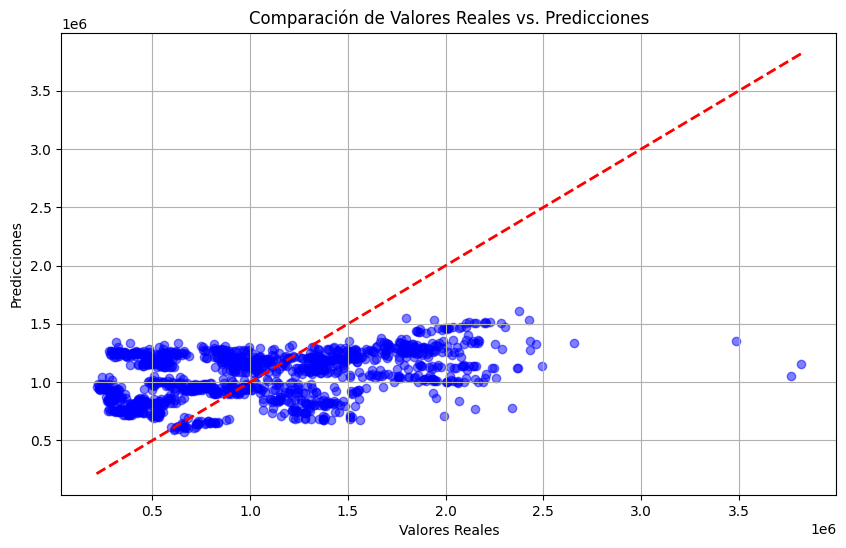

In [30]:
import matplotlib.pyplot as plt

#Realizamos las predicciones en los datos de prueba
y_pred = modelo_regresion.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.grid(True)
plt.show()

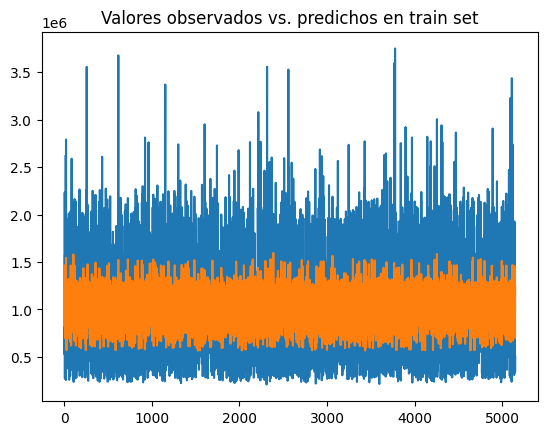

In [31]:
#Predicciones es el subgrupo de datos de entrenamiento
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

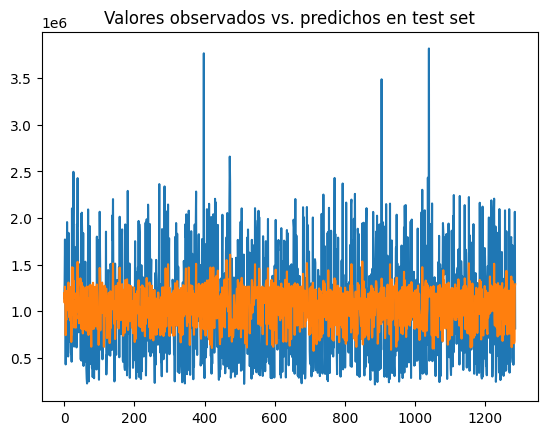

In [32]:
#Predicciones es el subgrupo de datos de prueba
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

In [33]:
#Feature importance

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [37]:
#Entrenar el modelo con los datos de entrenamiento
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [38]:
#realizar predicciones 
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

In [42]:
#r cuadrado 
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , round(r_square_train_std, 2))
print('El R^2 del subconjunto de prueba es:' , round(r_square_test_std, 2))

El R^2 del subconjunto de entrenamiento es: 0.14
El R^2 del subconjunto de prueba es: 0.15


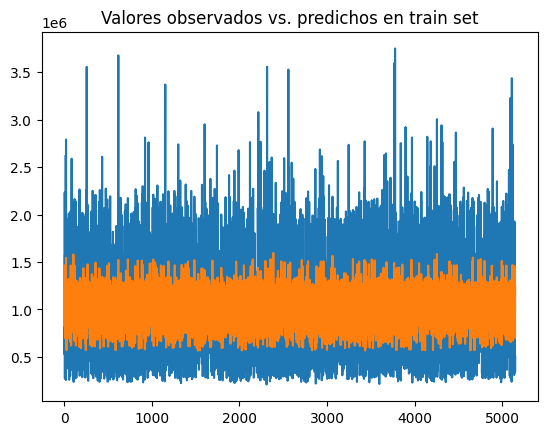

In [43]:
#Predicciones es el subgrupo de datos de entrenamiento
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

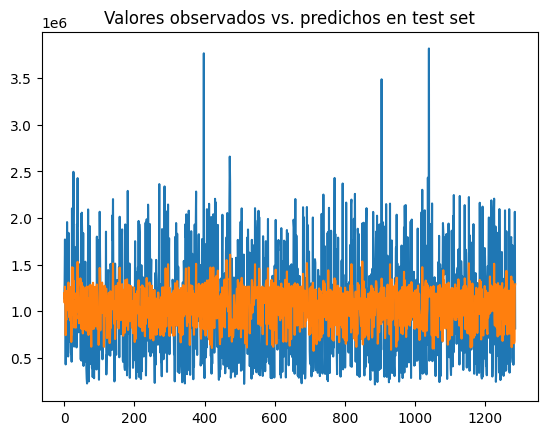

In [44]:
#Predicciones es el subgrupo de datos de prueba
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

In [45]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Entrenar el modelo con las características estandarizadas
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train_scaled, y_train)

# Obtener los coeficientes
coeficientes = modelo_regresion.coef_

# Crear un DataFrame para visualizar los coeficientes con sus respectivas variables
df_coef = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coeficientes
})

# Ordenar por el valor absoluto de los coeficientes
df_coef['Abs Coeficiente'] = df_coef['Coeficiente'].apply(np.abs)
df_coef = df_coef.sort_values(by='Abs Coeficiente', ascending=False)

# Mostrar las variables con mayor poder explicativo
print(df_coef)

             Variable    Coeficiente  Abs Coeficiente
6              tienda -196079.444743    196079.444743
1    indice_precios_c  -92061.884264     92061.884264
4      tasa_desempleo  -44585.348264     44585.348264
3      semana_festiva  -18699.115796     18699.115796
5         temperatura  -14337.472126     14337.472126
2  precio_combustible   -7487.868958      7487.868958
0                Date    6858.332663      6858.332663


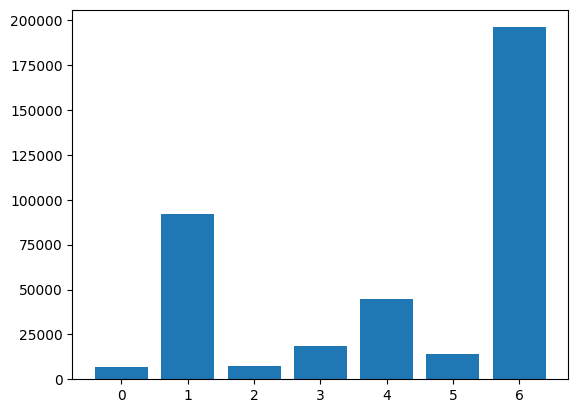

In [46]:
# Graficar la importancia o "feature importance"
importancia = modelo_regresion_std.coef_
plt.bar([x for x in range(len(importancia))], abs(importancia))
plt.show()